# Experiment 4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors
## Name: Sufiyan Mehsanewala 
## Class: SE AIML 
## Roll no: 44

In [37]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


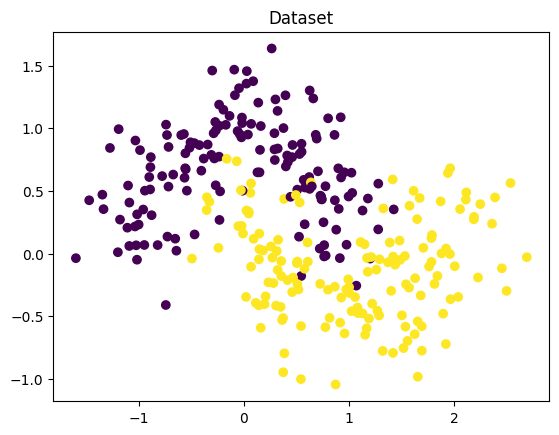

In [38]:
X, y = make_moons(n_samples = 300, noise = 0.25, random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Dataset")
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
#Part B: Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

LogisticRegression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


In [41]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN
Accuracy: 0.9111111111111111


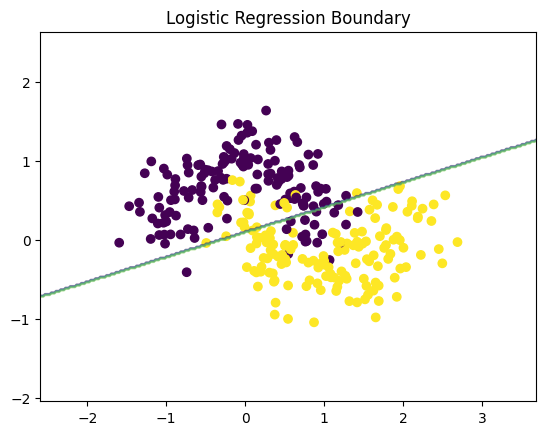

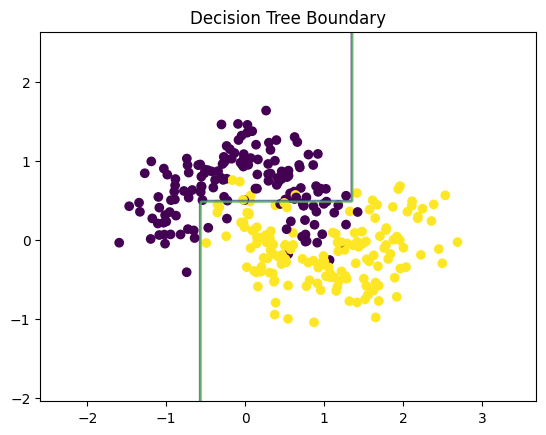

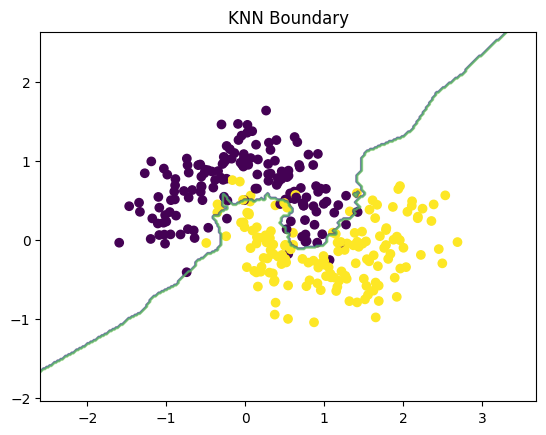

In [44]:
def plot_boundary(model, scaled, title):
    h = 0.02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaled:
        grid = scaler.transform(grid)
    
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, alpha = 0.3)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.title(title)
    plt.show()

plot_boundary(lr, True, "Logistic Regression Boundary")
plot_boundary(dt, False, "Decision Tree Boundary")
plot_boundary(knn, True, "KNN Boundary")